In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re
from scipy.stats import pearsonr


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
twoprimeo_pos = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958, 27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

twoprimeo_pos_25 = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958]

twoprimeo_pos_18 = [27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]
pseduo_u_pos = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_18 = [105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_25 = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974]
contigs = ["RDN18-1", "RDN25-1"]


In [3]:
# final ivt vs native
native_nop58_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/061719_R941_NOP58GAL.csv"
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06102019_R941_CBF5GAL.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06112019_R941_CBF5GLU.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06192019_R941_NOP58GLU.csv"
ivt_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/10142019_R941_IVT.csv"
WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210410_R941_WT_YPD.csv"
YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210405_R941_mutant448.csv"
YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210413_R941_mutant452.csv"
YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210415_R941_mutant451.csv"
WT_stationary = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210521_R941_WT_stationary.csv"
trl1d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210528_R941_trl1d_YPD.csv"
mix = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210618_R941_Mix.csv"
WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210412_R941_WT_KOAC.csv"
WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210414_R941_WT_CY.csv"
WT_PB = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210520_R941_WT_PB.csv"
Dbp3d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210527_R941_Dbp3d_YPD.csv"
WT_rapa5 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210531_R941_WT_rapa5.csv"
prp43_18deg = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210619_R941_prp43.csv"
ys603_18 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/YS603_18_YEPD_20210717.csv"
mix_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/MIX_20210716.csv"
prp16 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/prp16_18deg_YPD_20210719.csv"
spp382 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/spp382_YPD_20210720.csv"
sqs1d = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/sqs1d_YPD_20210730.csv"
dbr1d = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/dbr1d_YPD_20210729.csv"
YS602_18 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210722_R941_YS602_18_YPD.csv"
snR4 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210823_R941_snR4d_YPD.csv"
snR45 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210824_R941_snR45d_YPD.csv"
YWD448a_2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210825_R941_mutant448.csv"

# external experiments
snR34_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323585.csv"
snR3_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323586.csv"
snR36_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323587.csv"
# low coverage for wt1
sno_flongle_wt1 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323588.csv"
sno_flongle_wt2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475631.csv"
snR60_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475632.csv"
snR61_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475633.csv"
snR62_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475634.csv"
# Minion barcoded runs 
sno_control_wt_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_1.csv"
snr60_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_2.csv"
snr61_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_3.csv"
snr62_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_4.csv"
fraction1_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_1.csv"
fraction2_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_2.csv"
fraction3_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_3.csv"
fraction4_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_4.csv"
temp_stress_control_wt_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_1.csv"
cold_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_2.csv"
heat_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_4.csv"
oxidative_stress_wt_control_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_1.csv"
h2o2_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_2.csv"
oxidative_stress_wt_control_m_f3f4 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_3.csv"
h2o2_stress_f3f4_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_4.csv"
snr3_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_1.csv"
snr34_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_2.csv"
snr36_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_3.csv"
sno_control_wt2_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_4.csv"



# Percent Mod Analysis

In [16]:
all_file_paths = [YS602_18, prp16, WT_PB, spp382, sqs1d, dbr1d, WT_YPD]

all_labels = ["YS602_18", "prp16", "WT_PB", "spp382", "sqs1d", "dbr1d", "WT_YPD"]

vc = VariantCalls(all_file_paths, all_labels, color_map="tab20")


In [17]:
diff_table = {}
for x in all_labels:
    for contig in contigs:
        wt_mod = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="WT_YPD")
        mod = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label=x)
        diff = (wt_mod - mod)
    
        diff_table[f"{x}_{contig}"] = diff

diff_table = pd.DataFrame(diff_table)


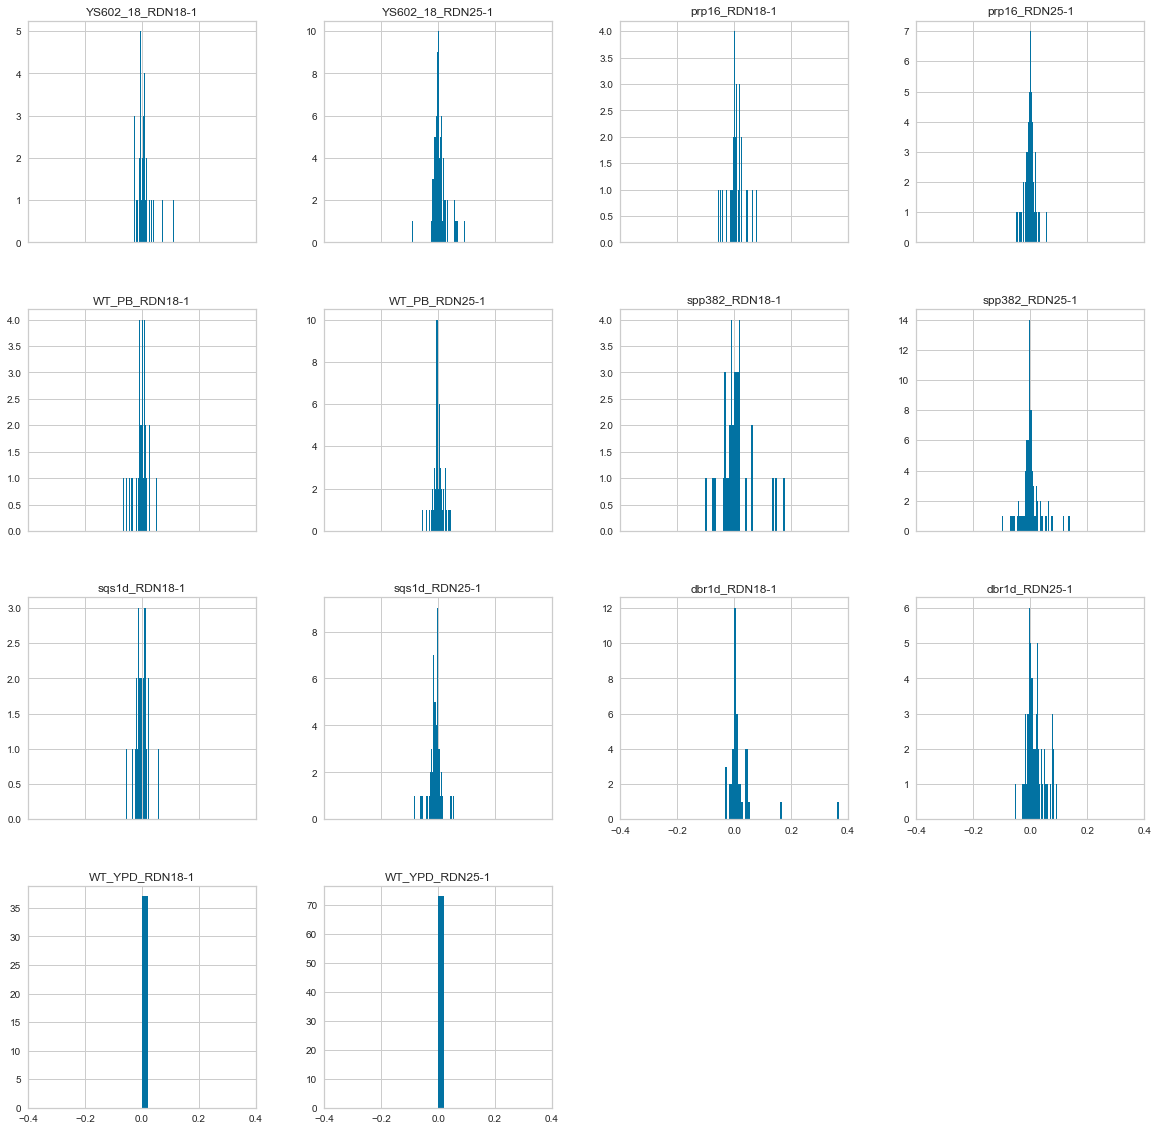

In [18]:
plots = diff_table.hist(sharex=True, bins=50, figsize=(20,20))
for array in plots:
    for subplot in array:
        subplot.set_xlim((-0.4, 0.4))


In [65]:
for x in all_labels:
    for contig in contigs:
        over_10_percent = diff_table[f"{x}_{contig}"][np.abs(diff_table[f"{x}_{contig}"]) > 0.05].sort_values(ascending=False)
        print(x, over_10_percent)

YS602_18 reference_index
1772    0.112617
561     0.093460
119     0.077212
1279    0.071532
Name: YS602_18_RDN18-1, dtype: float64
YS602_18 reference_index
2287    0.093032
907     0.067073
965     0.065433
875     0.060390
866     0.058418
804     0.055968
2190   -0.093355
Name: YS602_18_RDN25-1, dtype: float64
prp16 reference_index
1772    0.080168
1638    0.064046
105    -0.052913
631    -0.057829
Name: prp16_RDN18-1, dtype: float64
prp16 reference_index
2958    0.062663
2196    0.056185
1055   -0.050609
Name: prp16_RDN25-1, dtype: float64
WT_PB reference_index
973    0.051120
105   -0.055473
631   -0.060139
99    -0.065434
210   -0.089173
Name: WT_PB_RDN18-1, dtype: float64
WT_PB reference_index
965     0.084893
662     0.052262
2132   -0.057257
Name: WT_PB_RDN25-1, dtype: float64
spp382 reference_index
1772    0.177633
1279    0.146293
561     0.136683
119     0.065540
998     0.060788
301    -0.068416
631    -0.072446
419    -0.075219
210    -0.102262
Name: spp382_RDN18-1, dtype

# Cluster and Heatmap plotting

In [4]:
# vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")
all_file_paths = [YS602_18, prp16, WT_PB, spp382, sqs1d, dbr1d]
all_labels = ["1YS602_18", "2prp16", "3WT_PB", "4spp382", "5sqs1d", "6dbr1d"]

vc = VariantCalls(all_file_paths, all_labels, color_map="tab20")


<IPython.core.display.Javascript object>


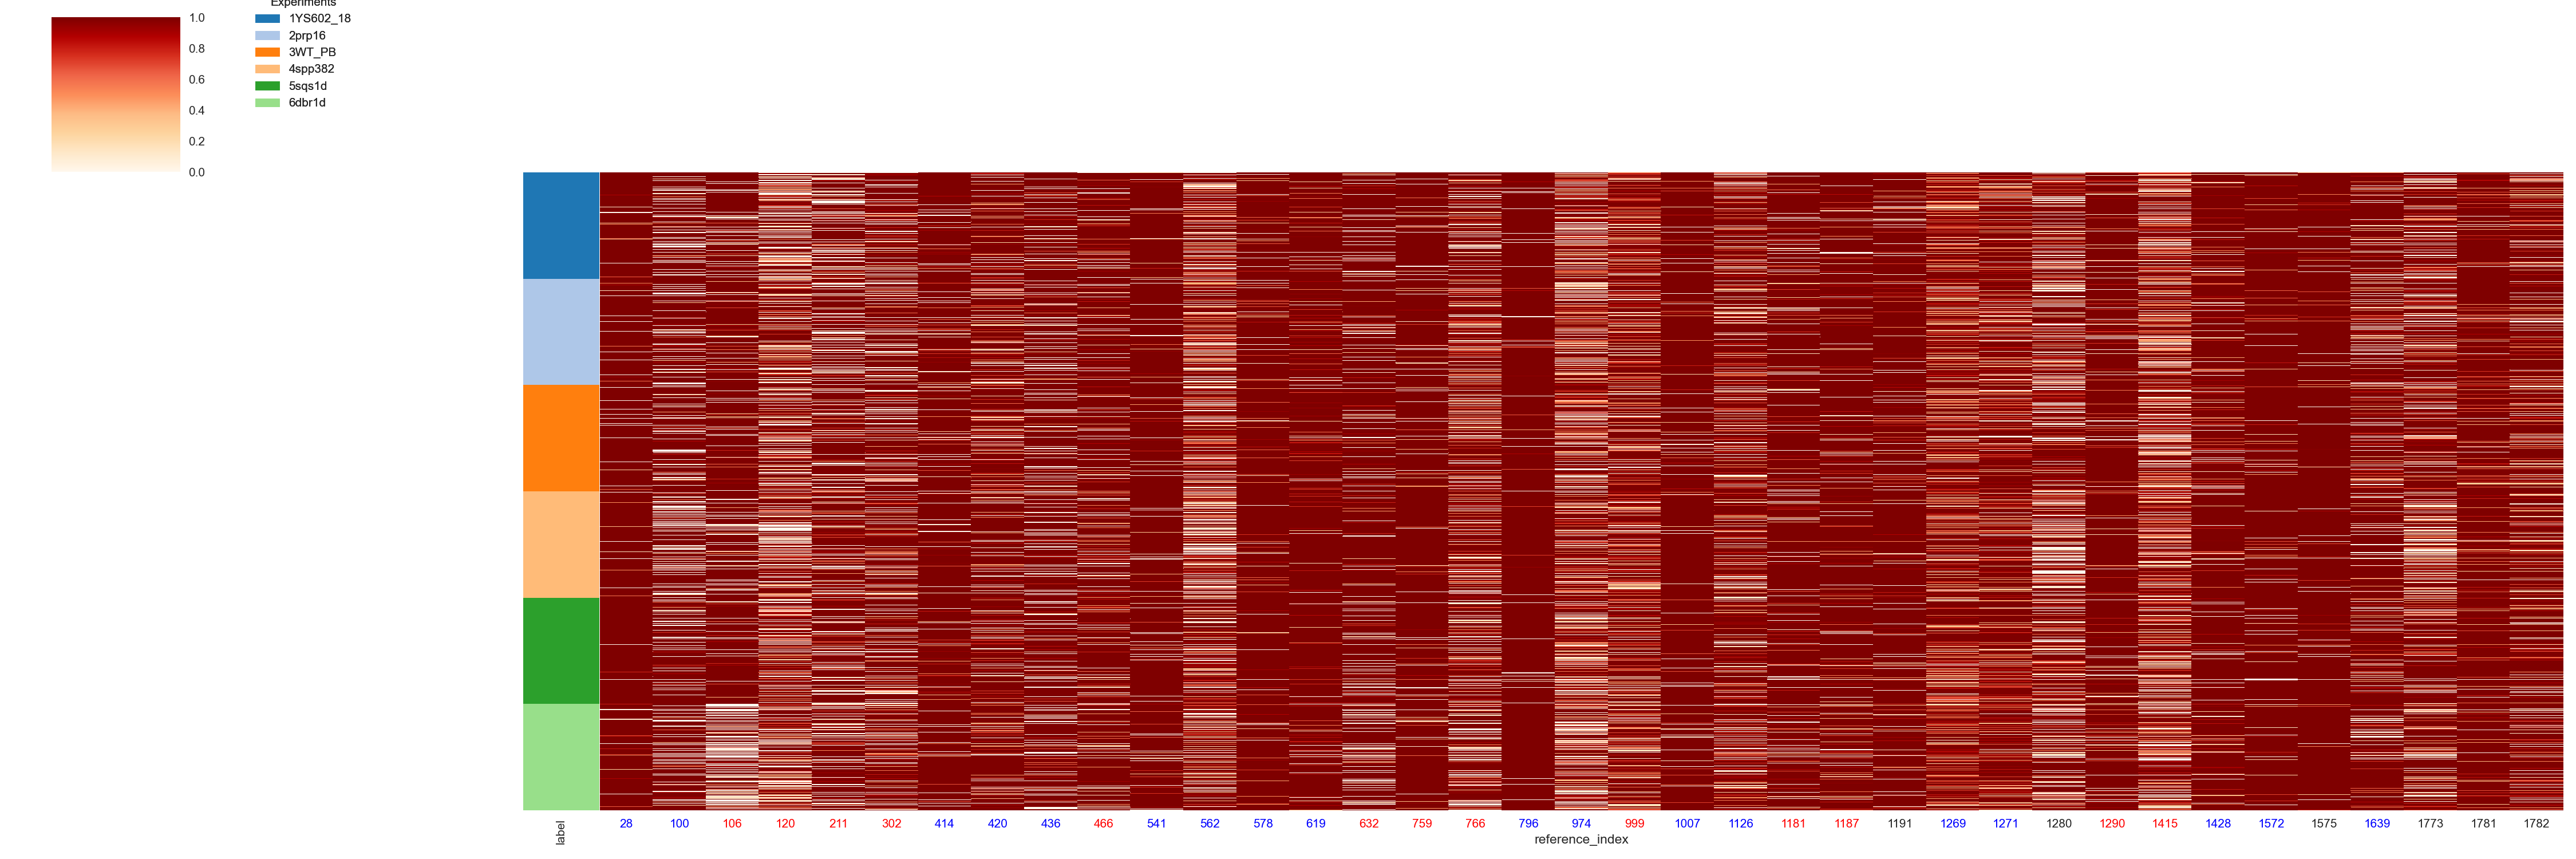

<IPython.core.display.Javascript object>


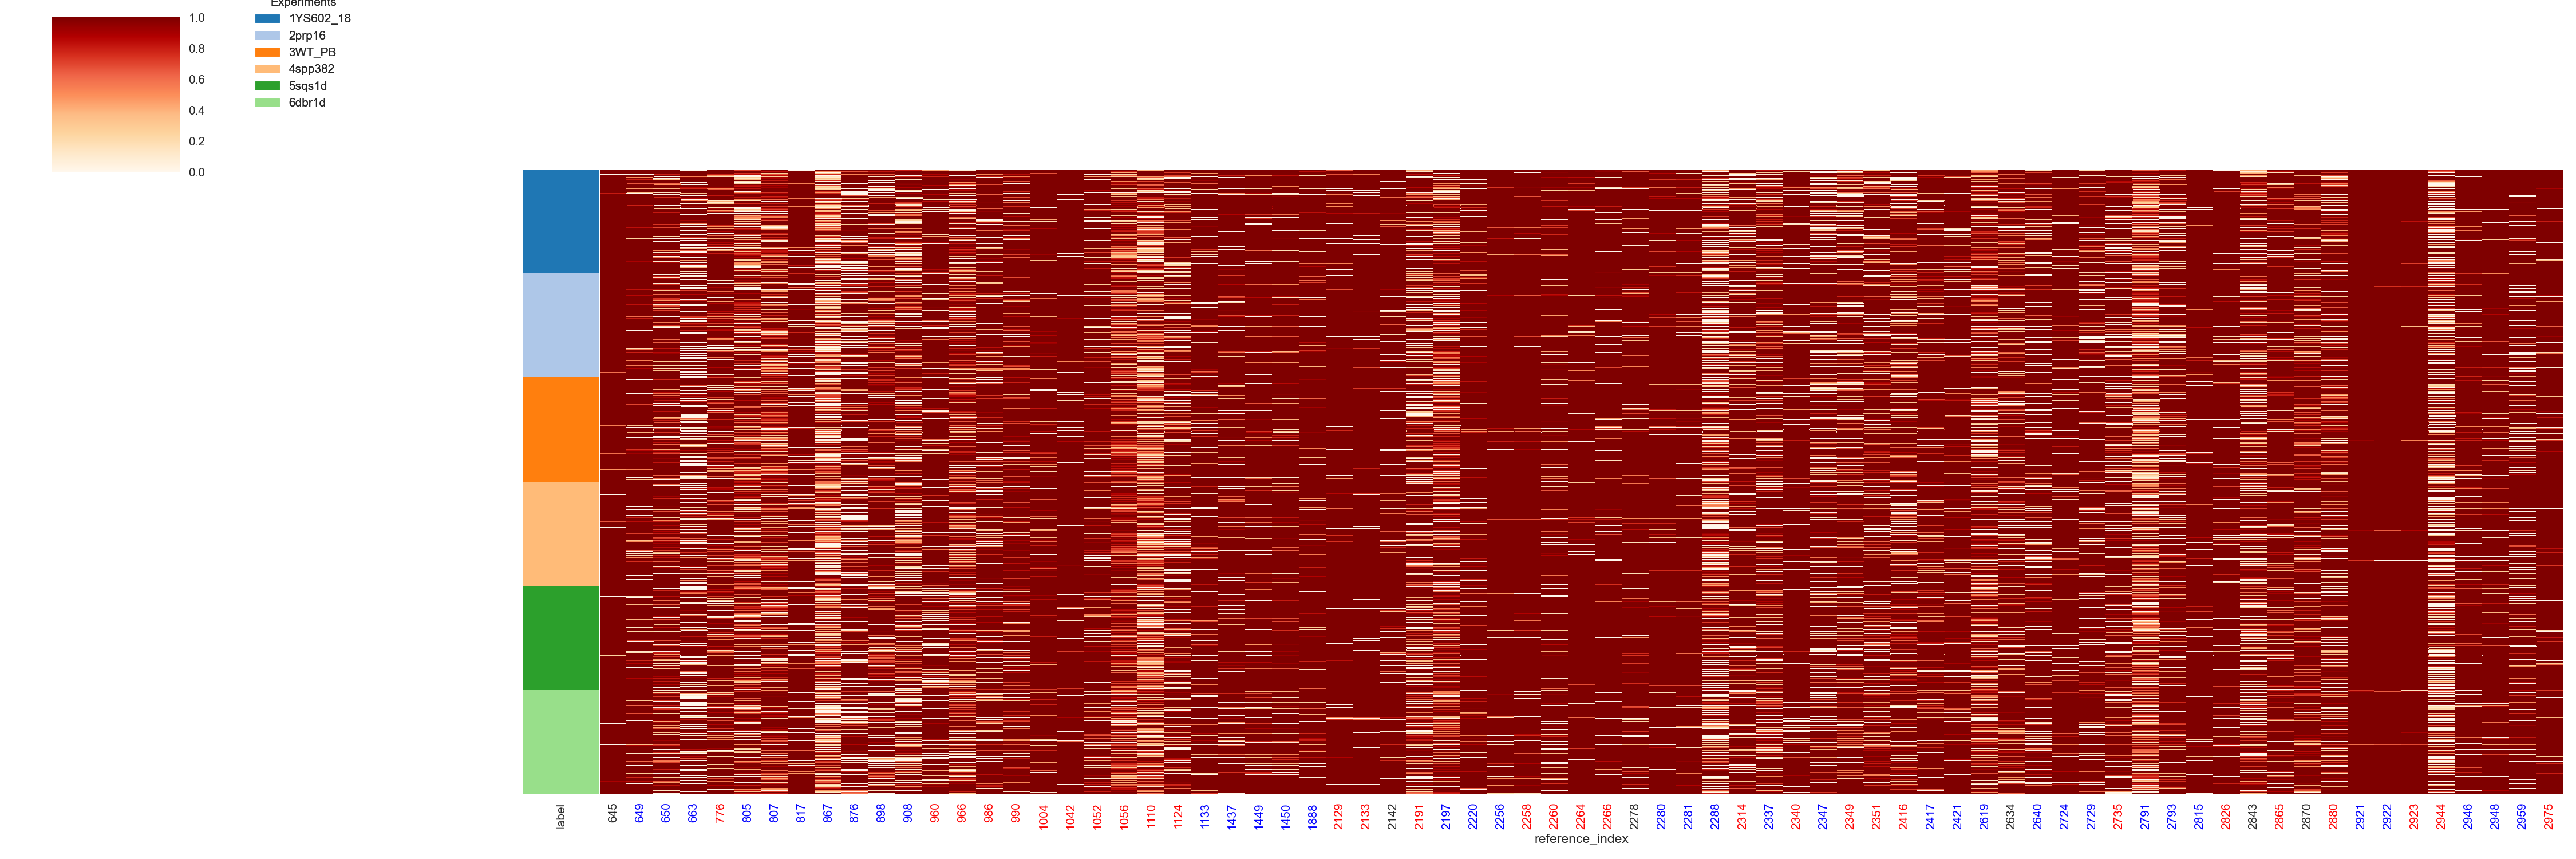

In [7]:
# from IPython.display import set_matplotlib_formats
# %matplotlib inline
# set_matplotlib_formats('svg')
# import matplotlib.pyplot as plt
# plt.rcParams['svg.fonttype'] = 'none'

%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"
label = None
# contig = 'RDN18-1'
for contig in contigs:
    label=None
    save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/splicing_and_other_experiments_supp/{contig}_heatmap_{label}.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                   metric=metric,
                                   method=method, 
                                   label=label,
                                   col_cluster=False,
                                   row_cluster=False,
                                   twoprimeo_pos=twoprimeo_pos,
                                   pseduo_u_pos=pseduo_u_pos,
                                  legend=legend,
                                  figsize=figsize)

    for label in all_labels:
    #     save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/splicing_and_other_experiments_supp/{contig}_heatmap_{label}.png"
        save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/splicing_and_other_experiments_supp/{contig}_dendrogram_{label}.png"

        g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                       metric=metric,
                                       method=method, 
                                       label=label,
                                       col_cluster=False,
                                       row_cluster=True,
                                       twoprimeo_pos=twoprimeo_pos,
                                       pseduo_u_pos=pseduo_u_pos,
                                      legend=legend,
                                      figsize=figsize)


# Correlations

In [59]:
c = vc.get_experiment_spearman_correlations()

In [58]:
c["ref_index1"] = 1123

In [44]:
c[["ref_index1", "ref_index2", "contig"]]

,ref_index1,ref_index2,contig
0,644,648,RDN25-1
1,644,649,RDN25-1
2,644,662,RDN25-1
3,644,775,RDN25-1
4,644,804,RDN25-1
...,...,...,...
3289,1638,1780,RDN18-1
3290,1638,1781,RDN18-1
3291,1772,1780,RDN18-1
3292,1772,1781,RDN18-1


In [34]:
c[[x+"_corr" for x in all_labels]]

,YS602_18_corr,prp16_corr,WT_PB_corr,spp382_corr,sqs1d_corr,dbr1d_corr,WT_YPD_corr
0,0.192750,0.198313,0.179330,0.164757,0.114941,0.165963,0.157805
1,0.082646,0.101077,0.067161,0.058026,0.048970,0.064206,0.062985
2,0.035971,0.007146,0.016482,0.038610,0.044799,0.000588,0.065810
3,0.003034,-0.006664,0.038826,-0.027099,-0.003641,-0.019048,-0.002350
4,0.001492,0.017113,-0.015458,0.027753,0.031084,-0.022913,0.013672
...,...,...,...,...,...,...,...
3289,0.072972,0.092974,0.055353,0.067337,0.050461,0.068212,0.040005
3290,0.099696,0.110947,0.083162,0.093492,0.065554,0.077452,0.094026
3291,0.075276,0.099903,0.052404,0.073448,0.068018,0.075478,0.055912
3292,0.083529,0.088840,0.074191,0.099441,0.062480,0.107162,0.071861


In [48]:
sub_from_wt = c[[x+"_corr" for x in all_labels]].sub(c['WT_YPD_corr'], axis=0)
sub_from_wt[["ref_index1", "ref_index2", "contig"]] = c[["ref_index1", "ref_index2", "contig"]]

In [49]:
sub_from_wt

,YS602_18_corr,prp16_corr,WT_PB_corr,spp382_corr,sqs1d_corr,dbr1d_corr,WT_YPD_corr,ref_index1,ref_index2,contig
0,0.034945,0.040508,0.021525,0.006952,-0.042865,0.008158,0.0,644,648,RDN25-1
1,0.019661,0.038091,0.004176,-0.004959,-0.014015,0.001221,0.0,644,649,RDN25-1
2,-0.029839,-0.058664,-0.049328,-0.027200,-0.021012,-0.065222,0.0,644,662,RDN25-1
3,0.005385,-0.004314,0.041176,-0.024749,-0.001291,-0.016698,0.0,644,775,RDN25-1
4,-0.012181,0.003441,-0.029130,0.014080,0.017411,-0.036586,0.0,644,804,RDN25-1
...,...,...,...,...,...,...,...,...,...,...
3289,0.032968,0.052970,0.015349,0.027333,0.010456,0.028207,0.0,1638,1780,RDN18-1
3290,0.005671,0.016922,-0.010864,-0.000534,-0.028471,-0.016573,0.0,1638,1781,RDN18-1
3291,0.019364,0.043991,-0.003507,0.017537,0.012106,0.019566,0.0,1772,1780,RDN18-1
3292,0.011668,0.016979,0.002330,0.027579,-0.009381,0.035300,0.0,1772,1781,RDN18-1


In [55]:
sub_from_wt.sort_values(by="dbr1d_corr")

,YS602_18_corr,prp16_corr,WT_PB_corr,spp382_corr,sqs1d_corr,dbr1d_corr,WT_YPD_corr,ref_index1,ref_index2,contig
2607,-0.152962,-0.250713,-0.079254,-0.366408,-0.179012,-0.176194,0.0,2921,2922,RDN25-1
2034,-0.087190,-0.086749,-0.089216,-0.157701,-0.156039,-0.150255,0.0,2277,2280,RDN25-1
1313,-0.129598,-0.126720,-0.090241,-0.101728,-0.082868,-0.144732,0.0,1123,2255,RDN25-1
1628,-0.034806,0.023427,-0.003729,0.008447,-0.028166,-0.120946,0.0,2128,2869,RDN25-1
1849,-0.026172,0.011415,0.013143,-0.029141,-0.070534,-0.120697,0.0,2255,2259,RDN25-1
...,...,...,...,...,...,...,...,...,...,...
1821,0.083937,0.066098,0.105944,0.091315,0.137199,0.124226,0.0,2219,2348,RDN25-1
1784,0.057738,0.050355,0.086888,0.058929,0.077293,0.124756,0.0,2196,2416,RDN25-1
917,0.086561,0.145288,0.012581,0.045908,0.056740,0.127032,0.0,985,989,RDN25-1
65,0.002875,0.035707,0.002726,0.005542,0.047996,0.129596,0.0,644,2921,RDN25-1


<IPython.core.display.Javascript object>


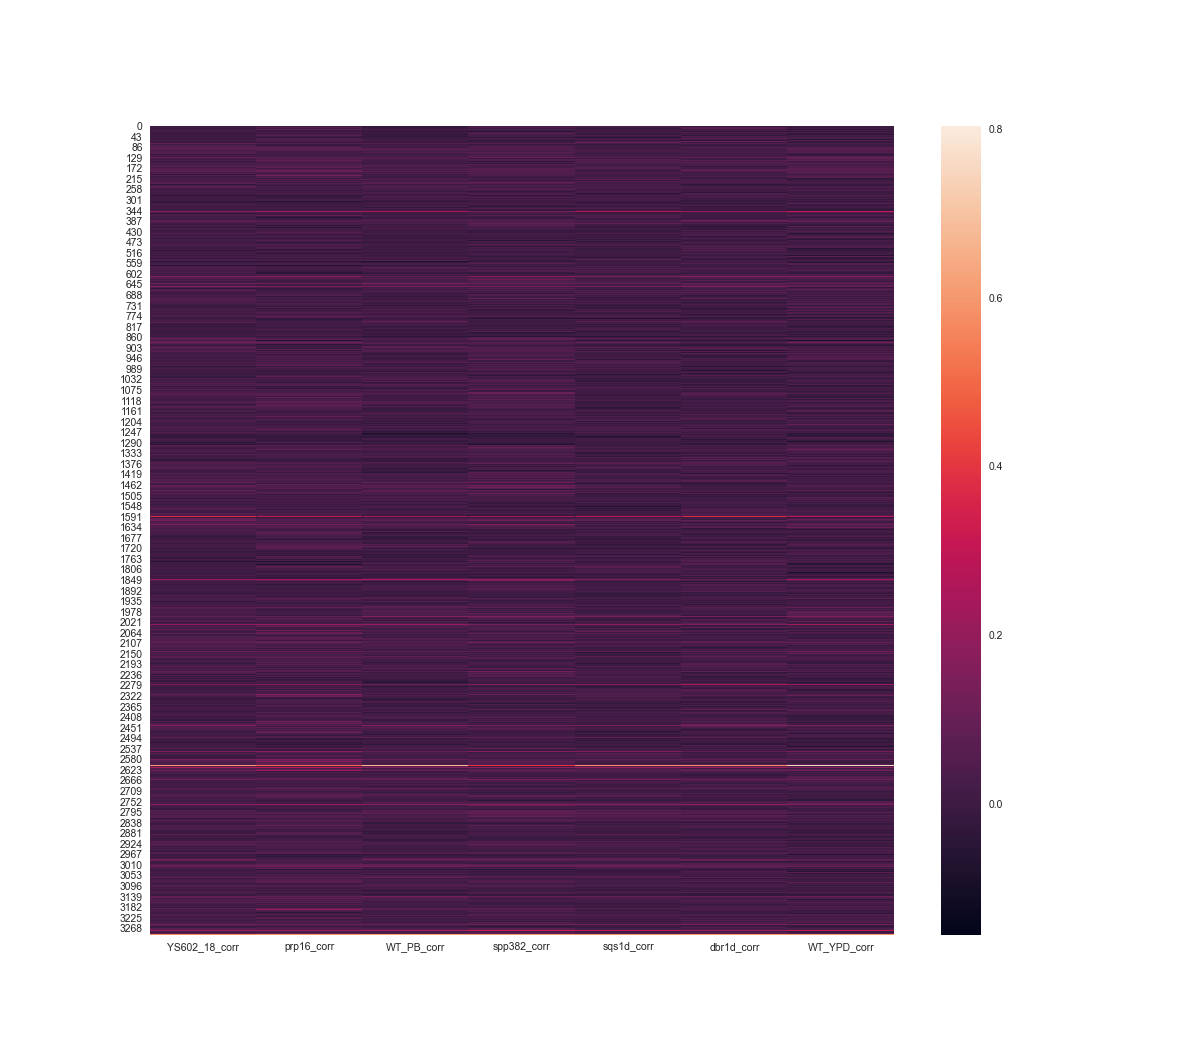

In [64]:
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(c[[x+"_corr" for x in all_labels]])

<IPython.core.display.Javascript object>


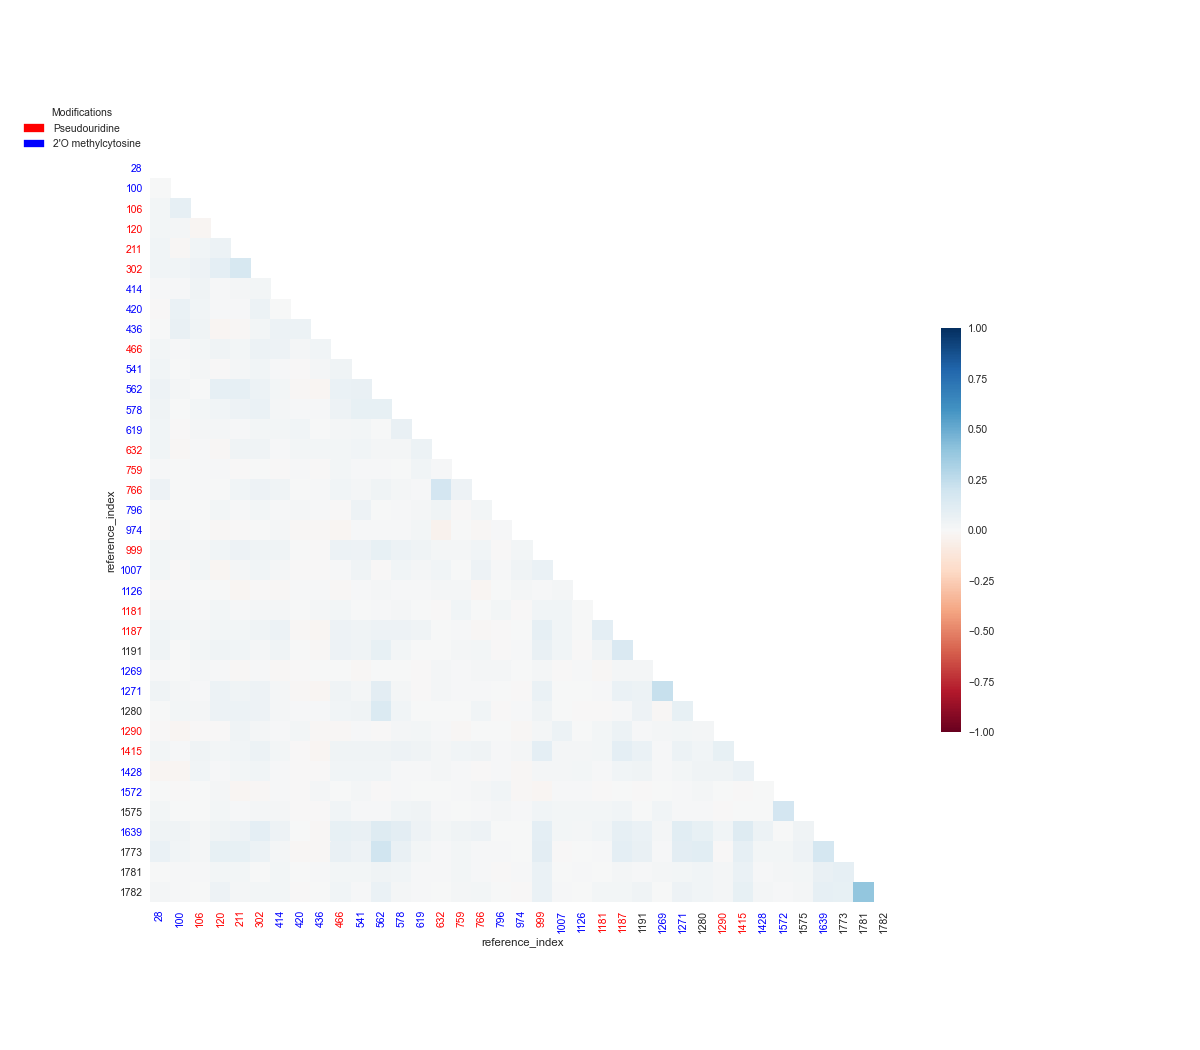

<IPython.core.display.Javascript object>


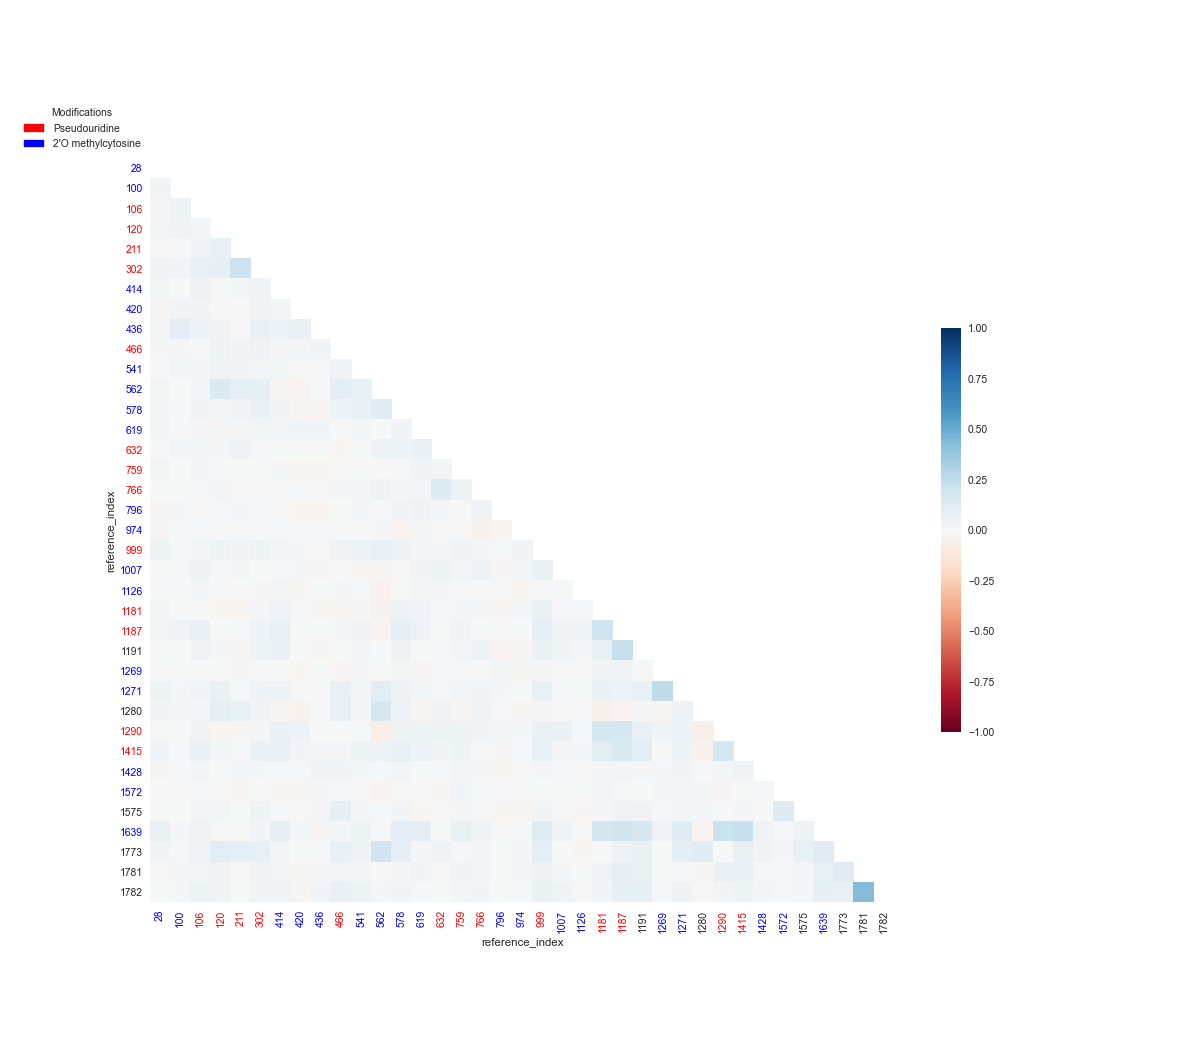

<IPython.core.display.Javascript object>


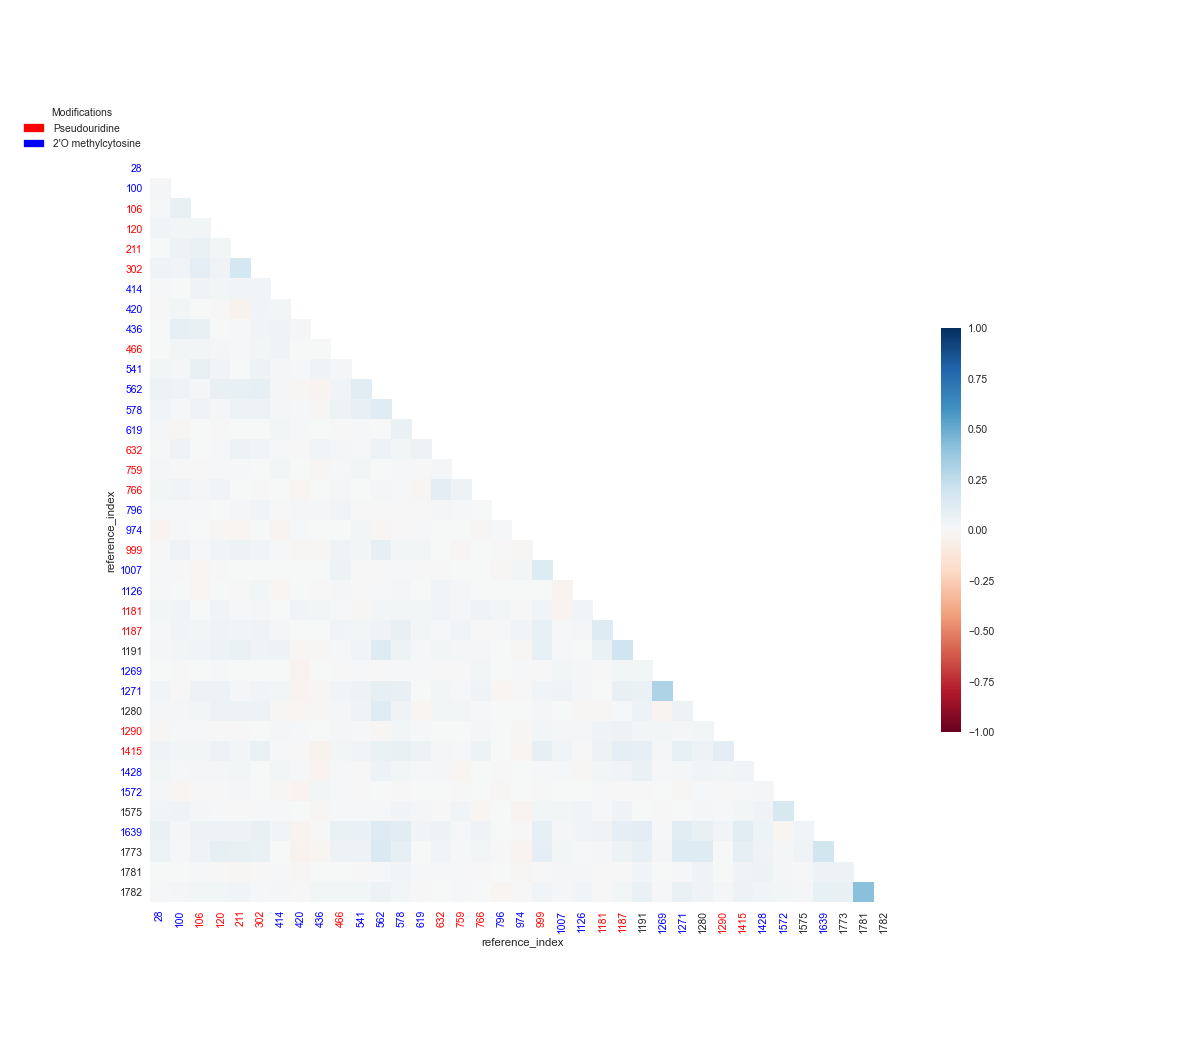

<IPython.core.display.Javascript object>


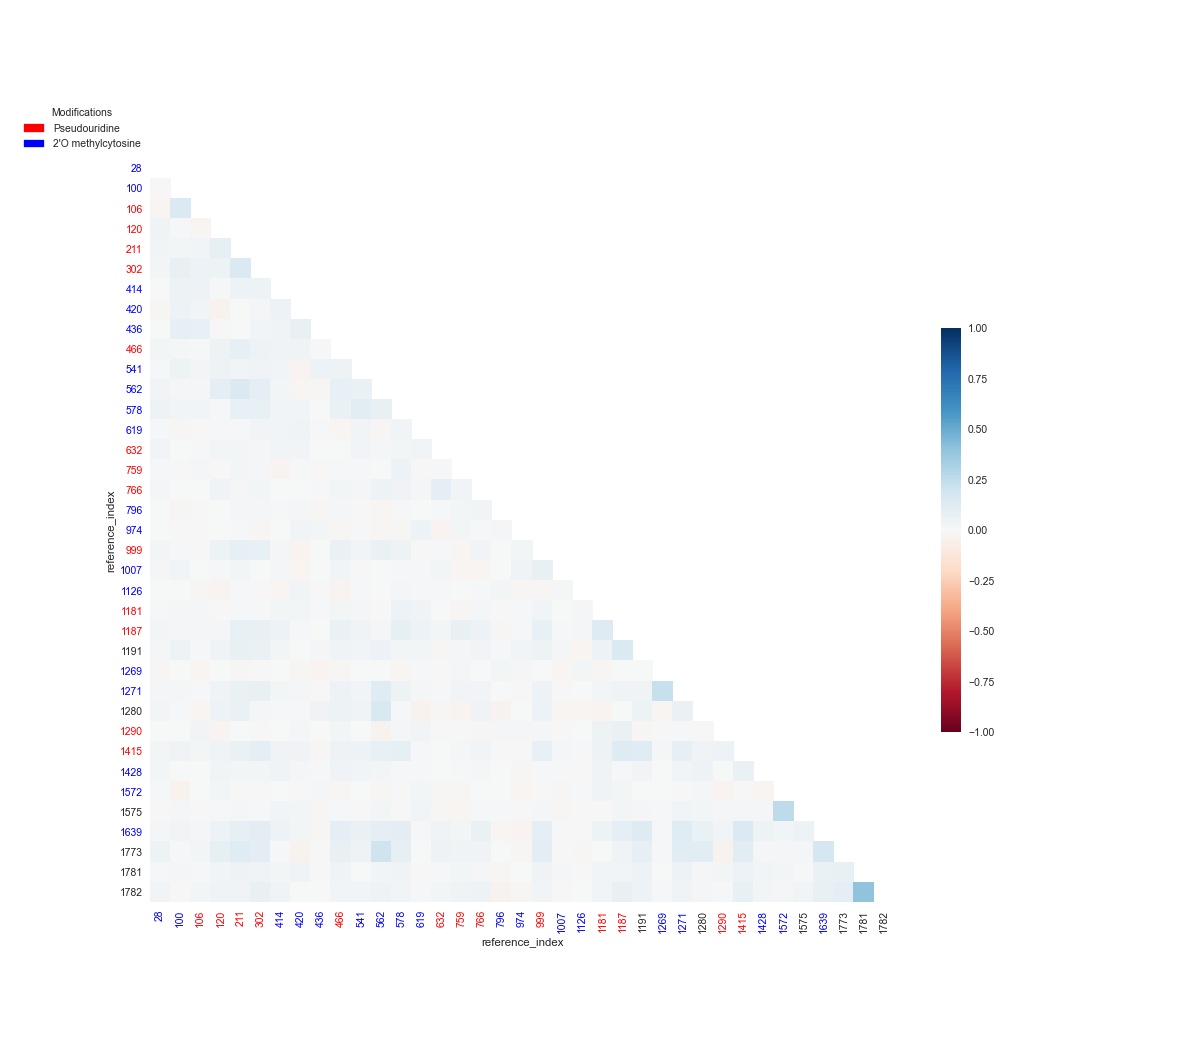

<IPython.core.display.Javascript object>


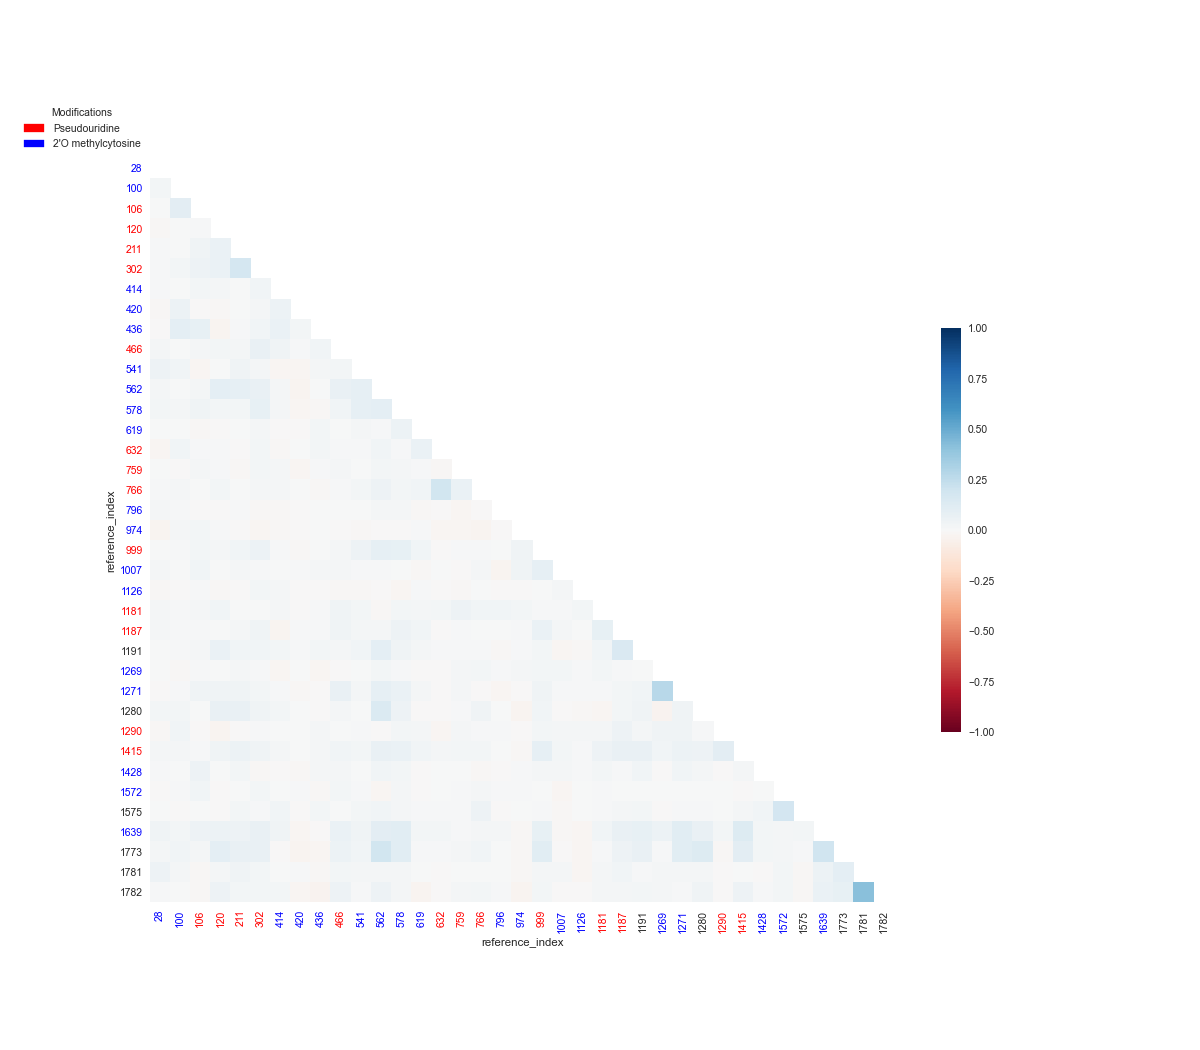

<IPython.core.display.Javascript object>


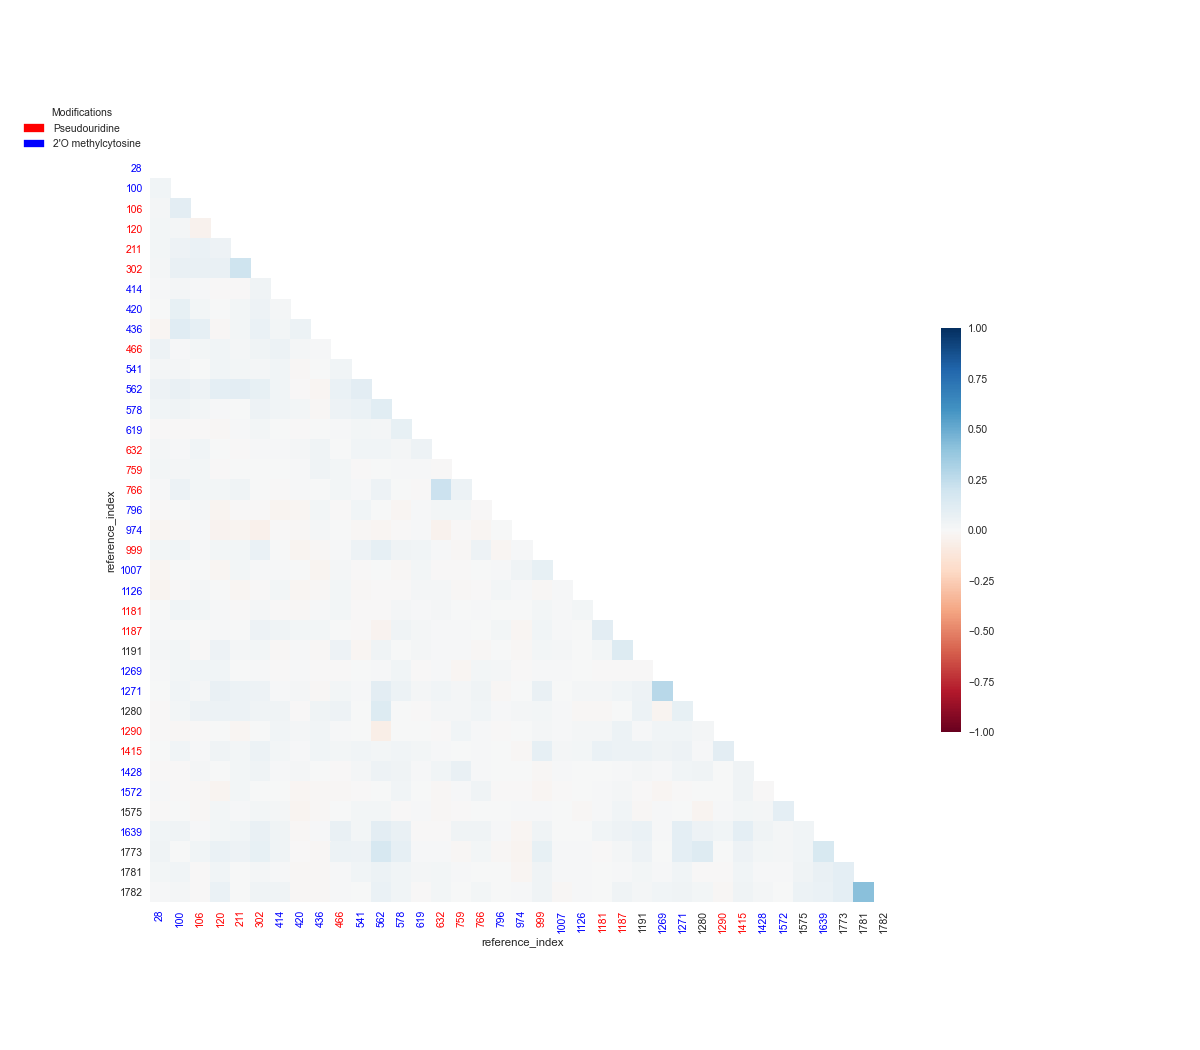

<IPython.core.display.Javascript object>


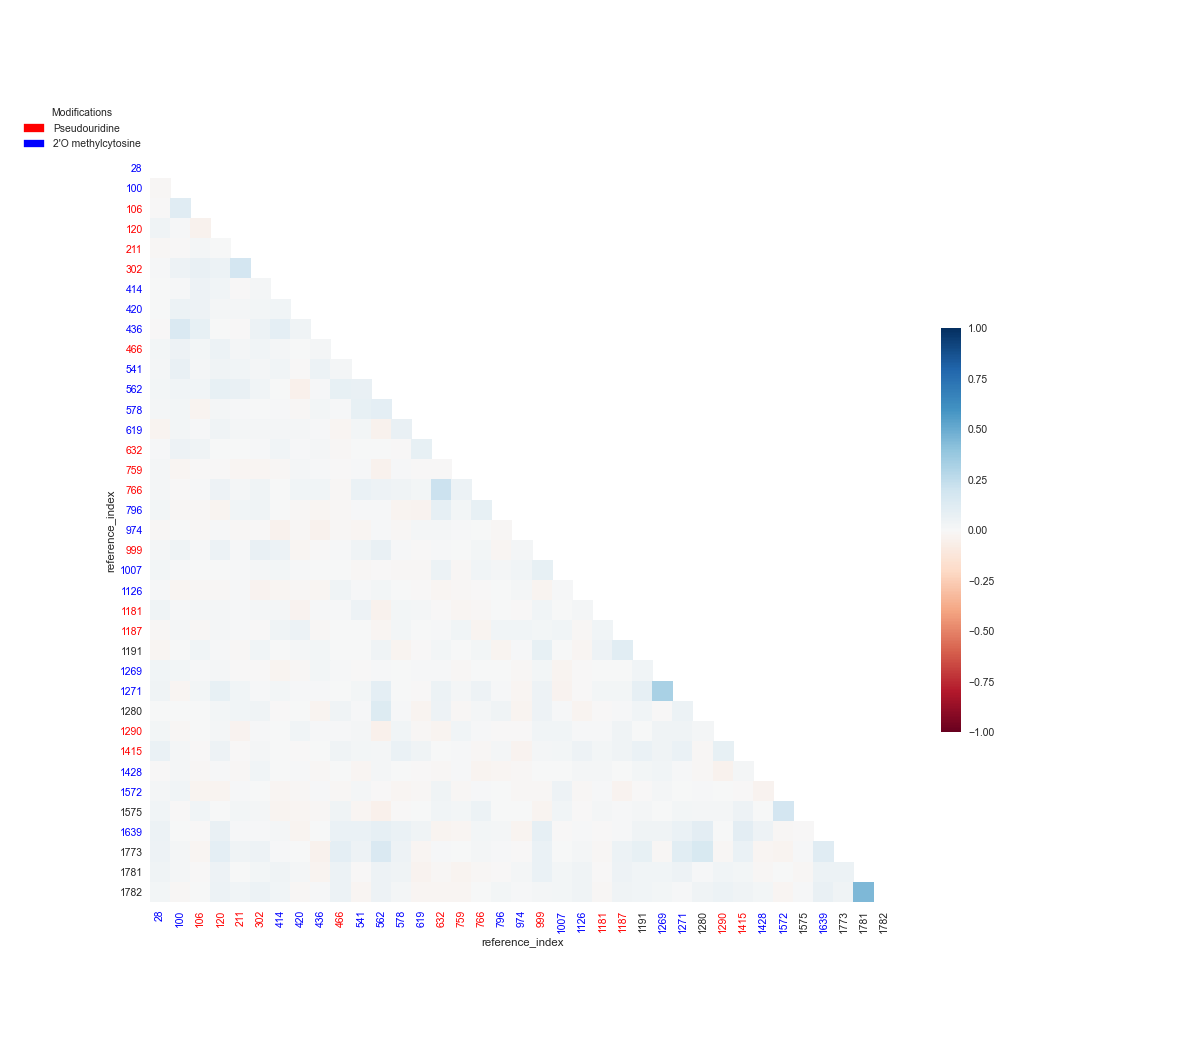

<IPython.core.display.Javascript object>


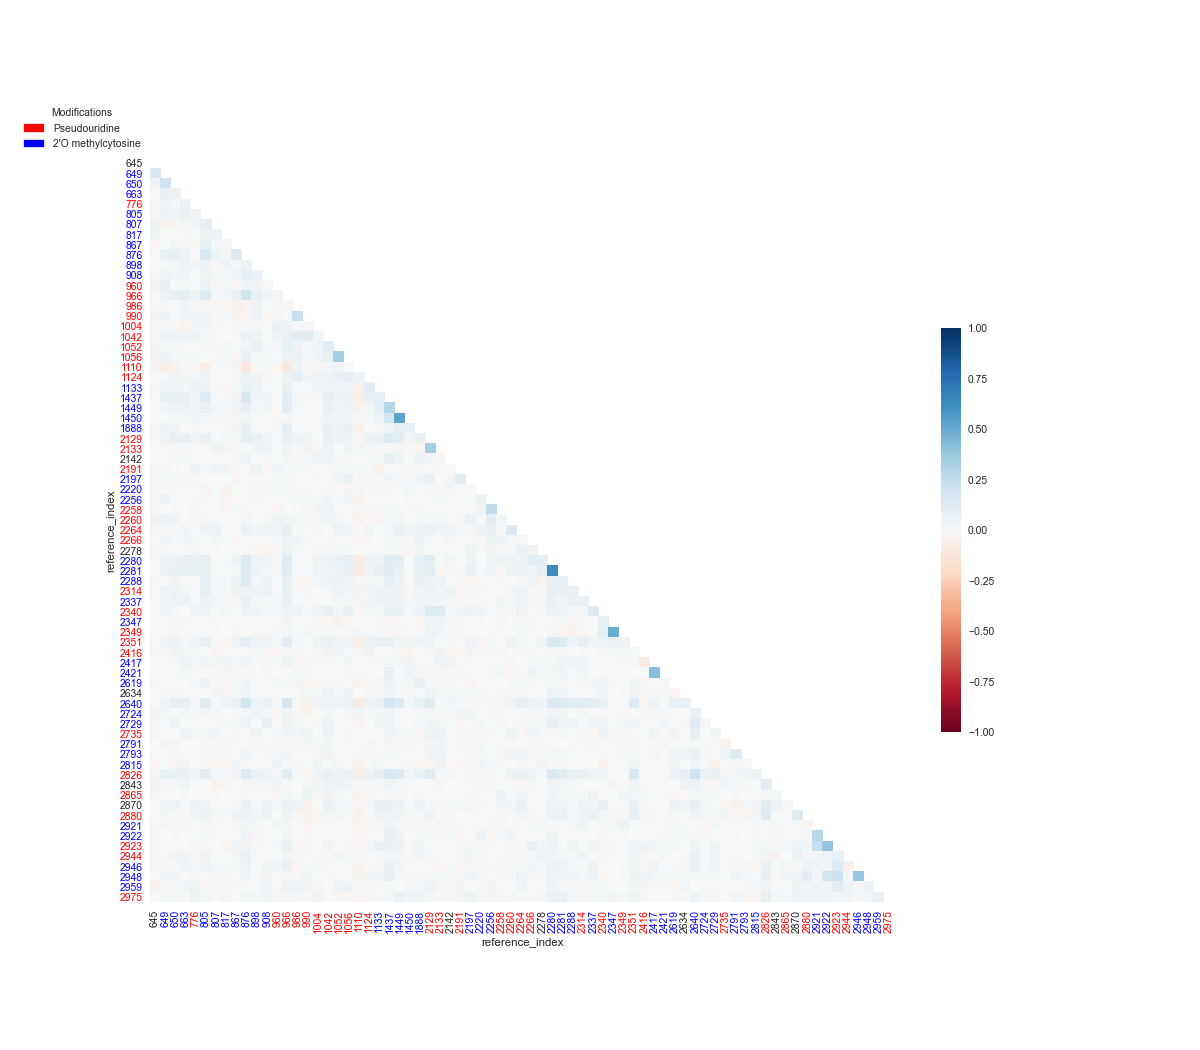

<IPython.core.display.Javascript object>


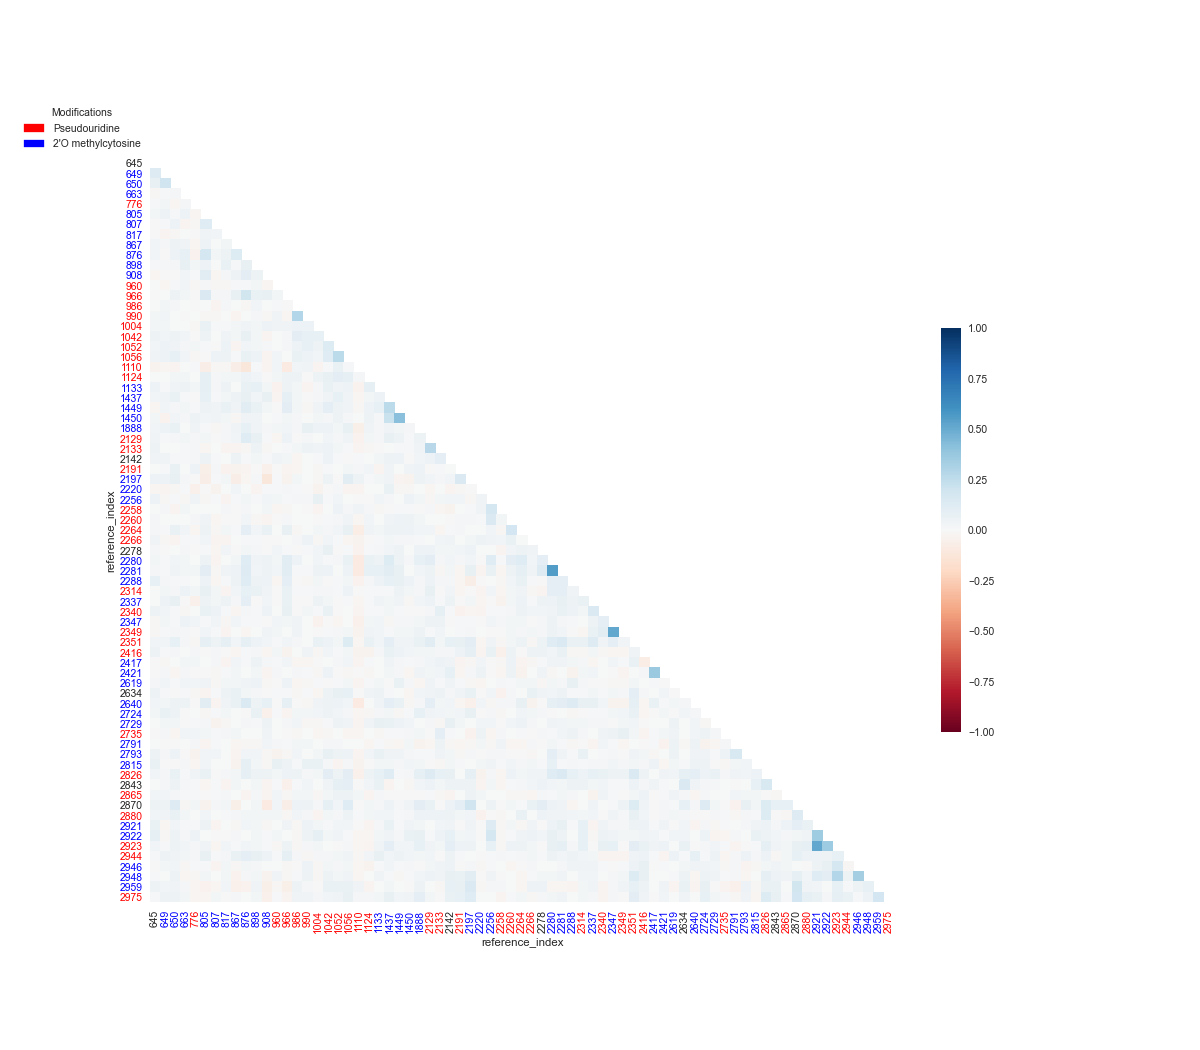

<IPython.core.display.Javascript object>


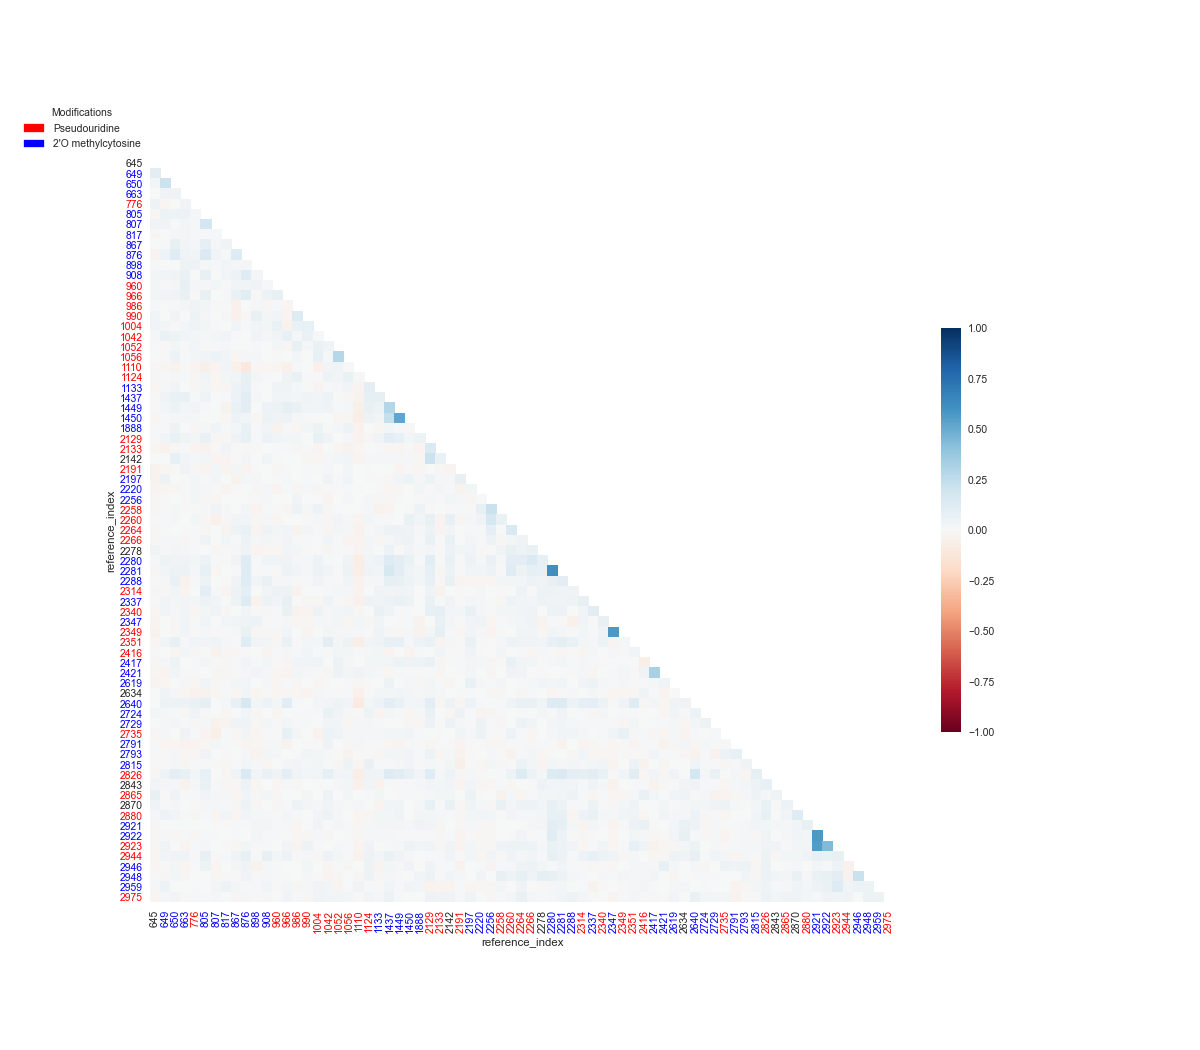

<IPython.core.display.Javascript object>


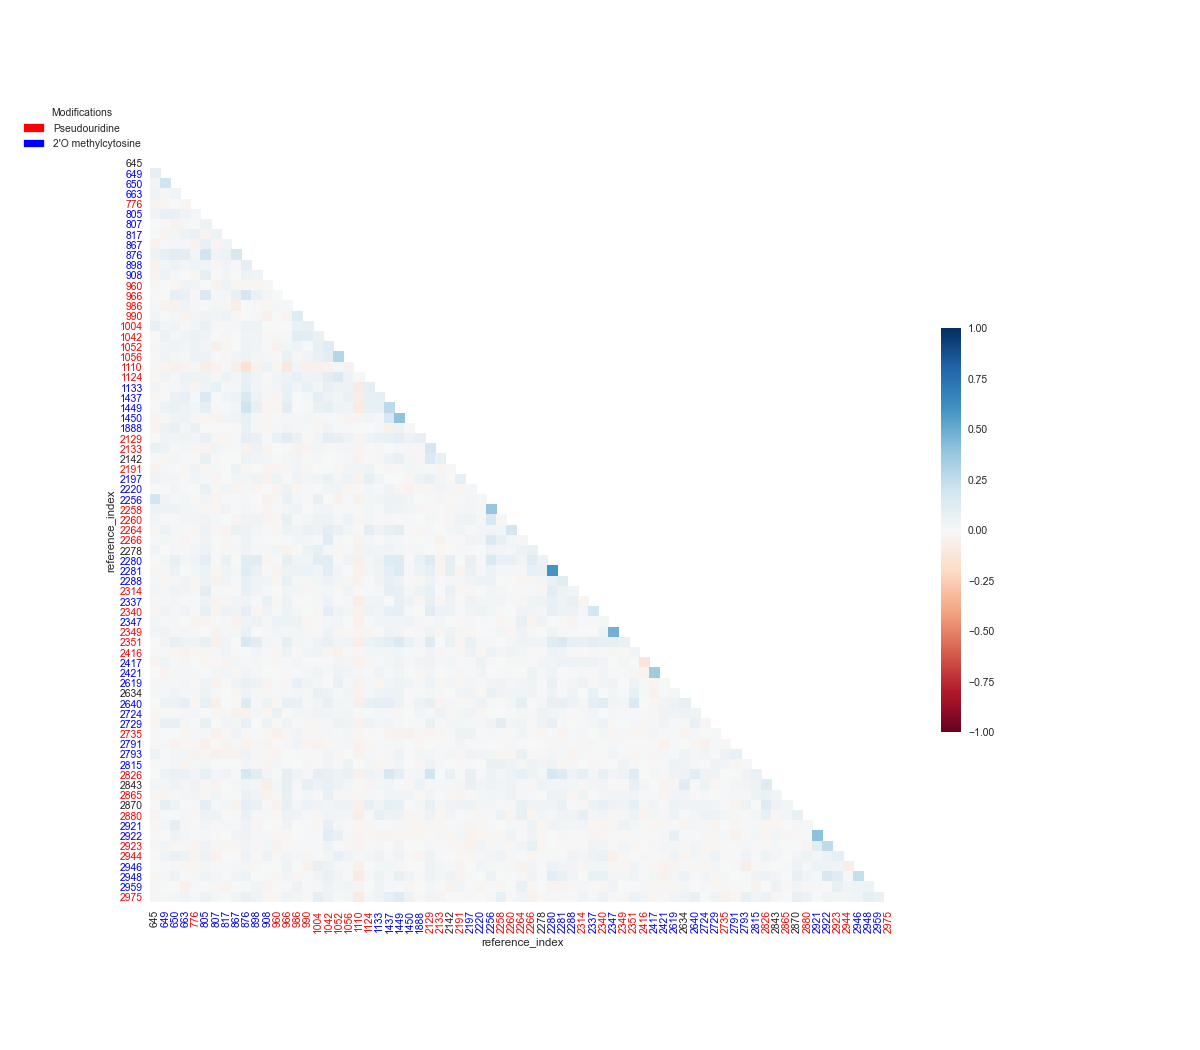

<IPython.core.display.Javascript object>


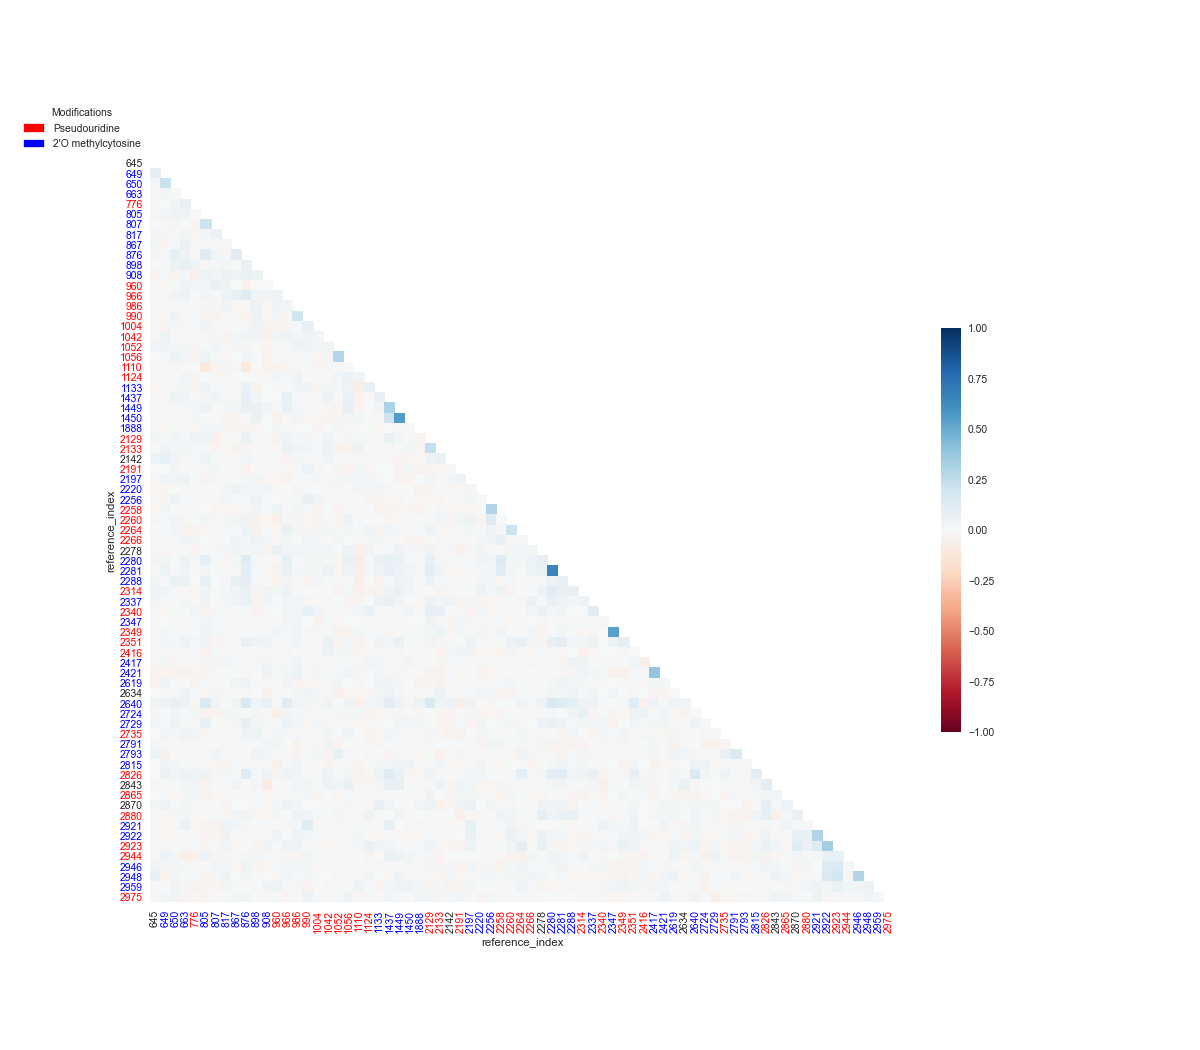

<IPython.core.display.Javascript object>


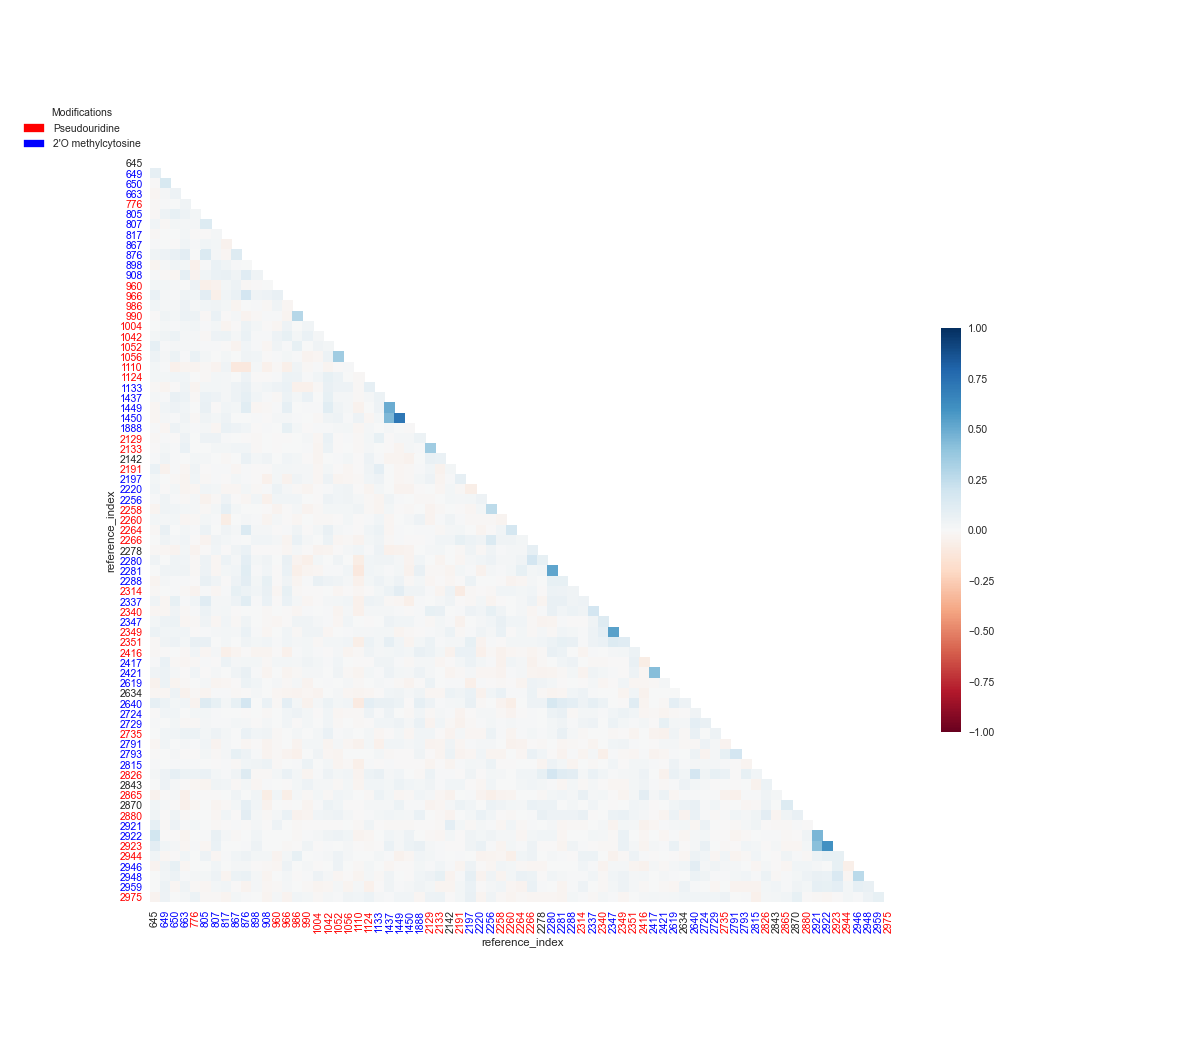

<IPython.core.display.Javascript object>


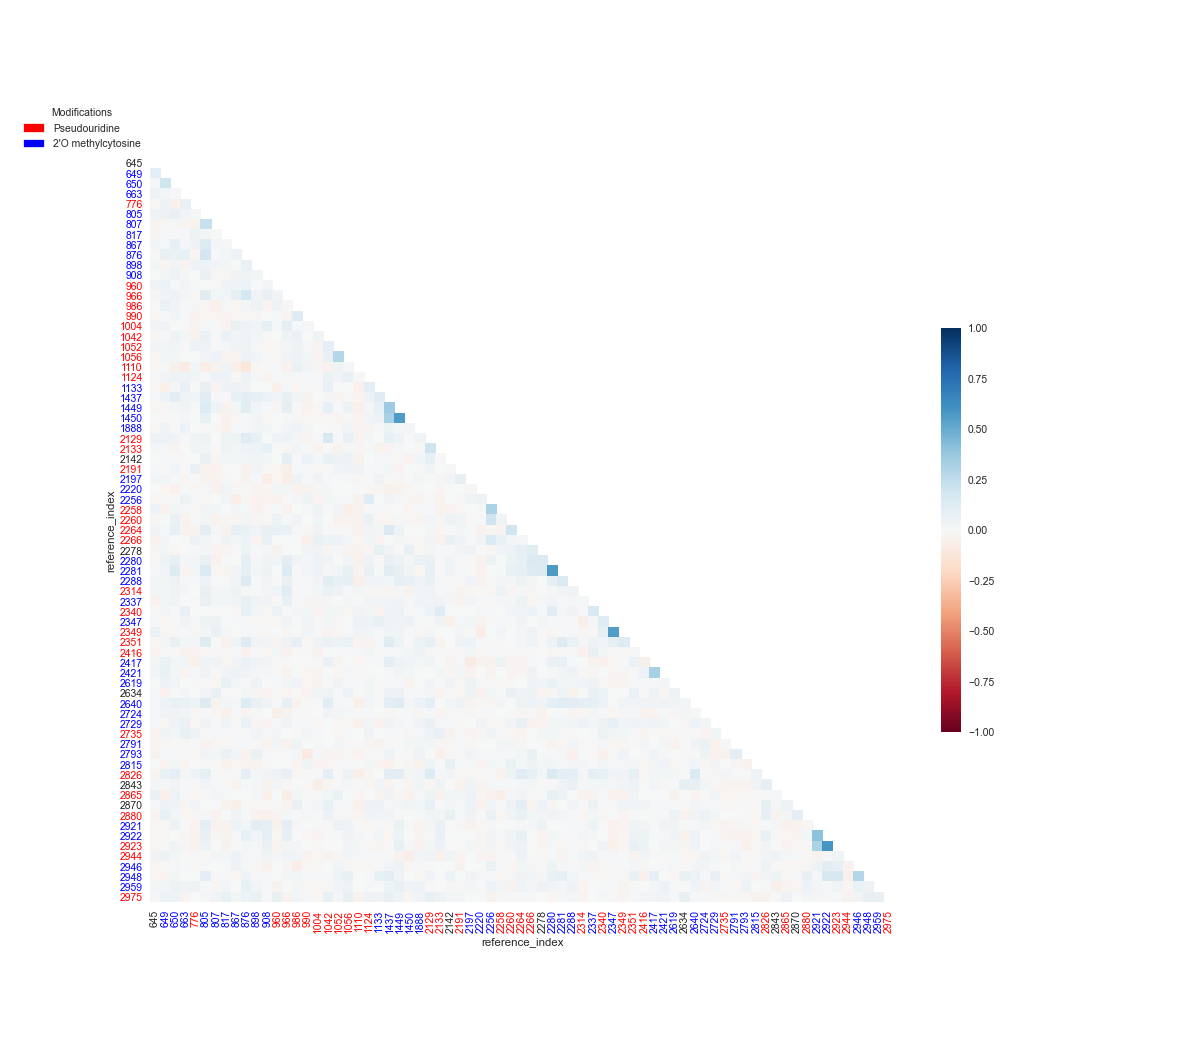

In [22]:

%matplotlib notebook

figsize = (30, 10)
save_fig_path = None
label = None
# contig = 'RDN18-1'
for contig in contigs:
    for label in all_labels:
        save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/splicing_and_other_experiments_supp/{contig}_correlations_{label}.png"
        g = vc.plot_ld_heatmap(contig, 
                               vc.get_contig_positions(contig), 
                               figure_path=save_fig_path, 
                               label=label,
                               vmax=1, vmin=-1,
                               stat="spearman"
                              )

